# LOADING LIBRARIES USED 

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading collar data
collar = pd.read_csv("C:/Users/chaukt1/Desktop/Collar.csv")

# Checking data structure

In [3]:
collar.head()

,Hole_ID,X (m),Y (m),Z (m),Depth_max (m),target
0,KRED207,530167.060,8714340.880,1330.600,104.5,1
1,KRED209,530024.162,8714201.452,1331.309,113.0,1
2,KRED211,530079.988,8714416.366,1330.504,155.0,1
3,KRED212,530246.989,8714518.866,1329.942,161.0,1
4,KRED218,530027.489,8714330.724,1331.295,170.0,1


In [4]:
collar.shape

(66, 6)

In [5]:
collar.describe()

,X (m),Y (m),Z (m),Depth_max (m),target
count,66.000000,6.600000e+01,66.000000,66.000000,66.000000
mean,530120.498545,8.714424e+06,1330.574621,148.265152,1.121212
std,131.854344,1.394638e+02,0.914364,45.392919,0.328875
min,529863.836000,8.714125e+06,1328.925000,77.000000,1.000000
25%,530027.749500,8.714330e+06,1329.912250,116.625000,1.000000
50%,530123.005500,8.714419e+06,1330.555000,144.750000,1.000000
75%,530218.644500,8.714519e+06,1331.289500,170.000000,1.000000
max,530397.278000,8.714717e+06,1332.649000,287.000000,2.000000


In [6]:
collar.dtypes

Hole_ID           object
X (m)            float64
Y (m)            float64
Z (m)            float64
Depth_max (m)    float64
target             int64
dtype: object

In [7]:
#Checking missing values
collar.isna().any()

Hole_ID          False
X (m)            False
Y (m)            False
Z (m)            False
Depth_max (m)    False
target           False
dtype: bool

In [8]:
#checking column of the data
collar.columns

Index(['Hole_ID', 'X (m)', 'Y (m)', 'Z (m)', 'Depth_max (m)', 'target'], dtype='object')

In [9]:
#loading constraints from sdv
from sdv.constraints import FixedCombinations

In [10]:
#Applyimg the fixedcombinations contrains into the column data
Location = FixedCombinations(column_names=['X (m)', 'Y (m)', 'Z (m)', 'Depth_max (m)'])

In [11]:
#defining constrains
constraints = [Location]

In [12]:
#Importing CTGAN model from the SDV libraries
from sdv.tabular import CTGAN

In [13]:
#Training and fitting the data
batch_size = 1000
epochs = 100

model = CTGAN(primary_key='Hole_ID',constraints=constraints, generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256), batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(collar)

Epoch 1, Loss G:  4.3496,Loss D:  0.0031
Epoch 2, Loss G:  4.3437,Loss D: -0.0047
Epoch 3, Loss G:  4.3498,Loss D: -0.0093
Epoch 4, Loss G:  4.3599,Loss D: -0.0154
Epoch 5, Loss G:  4.3591,Loss D:  0.0004
Epoch 6, Loss G:  4.3276,Loss D: -0.0079
Epoch 7, Loss G:  4.3226,Loss D: -0.0039
Epoch 8, Loss G:  4.3065,Loss D: -0.0075
Epoch 9, Loss G:  4.3049,Loss D: -0.0154
Epoch 10, Loss G:  4.3008,Loss D: -0.0066
Epoch 11, Loss G:  4.2799,Loss D: -0.0127
Epoch 12, Loss G:  4.2853,Loss D: -0.0019
Epoch 13, Loss G:  4.2685,Loss D: -0.0120
Epoch 14, Loss G:  4.2765,Loss D: -0.0092
Epoch 15, Loss G:  4.2724,Loss D: -0.0092
Epoch 16, Loss G:  4.2646,Loss D: -0.0088
Epoch 17, Loss G:  4.2329,Loss D:  0.0037
Epoch 18, Loss G:  4.2324,Loss D:  0.0134
Epoch 19, Loss G:  4.2090,Loss D:  0.0056
Epoch 20, Loss G:  4.2244,Loss D:  0.0478
Epoch 21, Loss G:  4.2184,Loss D:  0.0319
Epoch 22, Loss G:  4.2164,Loss D:  0.0004
Epoch 23, Loss G:  4.2032,Loss D:  0.0009
Epoch 24, Loss G:  4.2066,Loss D:  0.0389
E

In [14]:
#Generating synthetic collar data through CTGAN
n_generated_data = 66
new_collar = model.sample(n_generated_data)

Sampling rows: 100%|██████████| 66/66 [00:00<00:00, 1180.58it/s]


In [15]:
#Loading evaluating 
from sdv.evaluation import evaluate

In [16]:
#checking the data structure of new collar
new_collar.head()

,Hole_ID,X (m),Y (m),Z (m),Depth_max (m),target
0,a,530281.011,8714666.837,1328.925,170.0,1
1,b,530094.023,8714469.233,1330.420,161.0,1
2,c,529930.397,8714345.391,1331.806,221.0,1
3,d,530342.430,8714466.323,1329.621,154.5,1
4,e,530311.498,8714519.124,1329.072,120.5,1


In [17]:
#Loading the table evaluator
from table_evaluator import load_data, TableEvaluator

In [18]:
#evaluating quality of the data
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(collar, new_collar)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7857   0.7857              0.7500
DecisionTreeClassifier_real   0.9286   0.8571              0.6471
LogisticRegression_fake       0.7857   0.7857              1.0000
LogisticRegression_real       0.7143   0.7143              1.0000
MLPClassifier_fake            0.7857   0.7857              1.0000
MLPClassifier_real            0.7143   0.7143              1.0000
RandomForestClassifier_fake   0.7857   0.8571              0.8667
RandomForestClassifier_real   0.9286   0.7857              0.5556

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.4386
nearest neighbor std                     0.2396

Miscellaneous results:
                                  Result
Column Cor

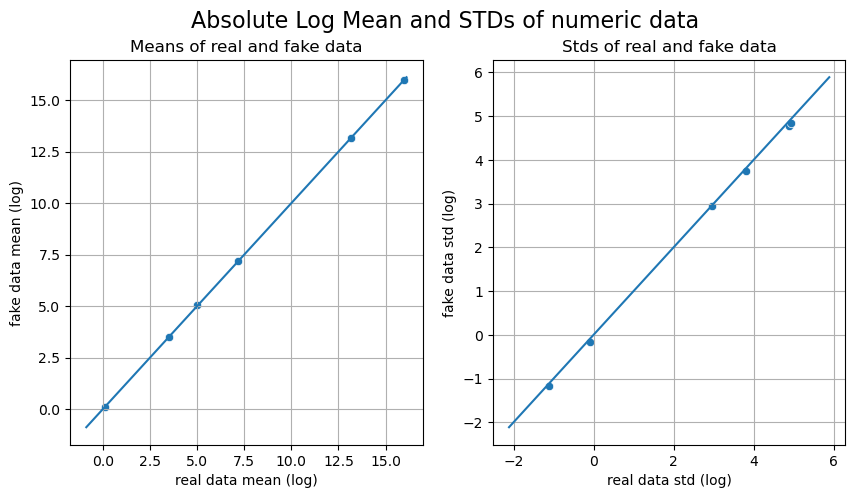

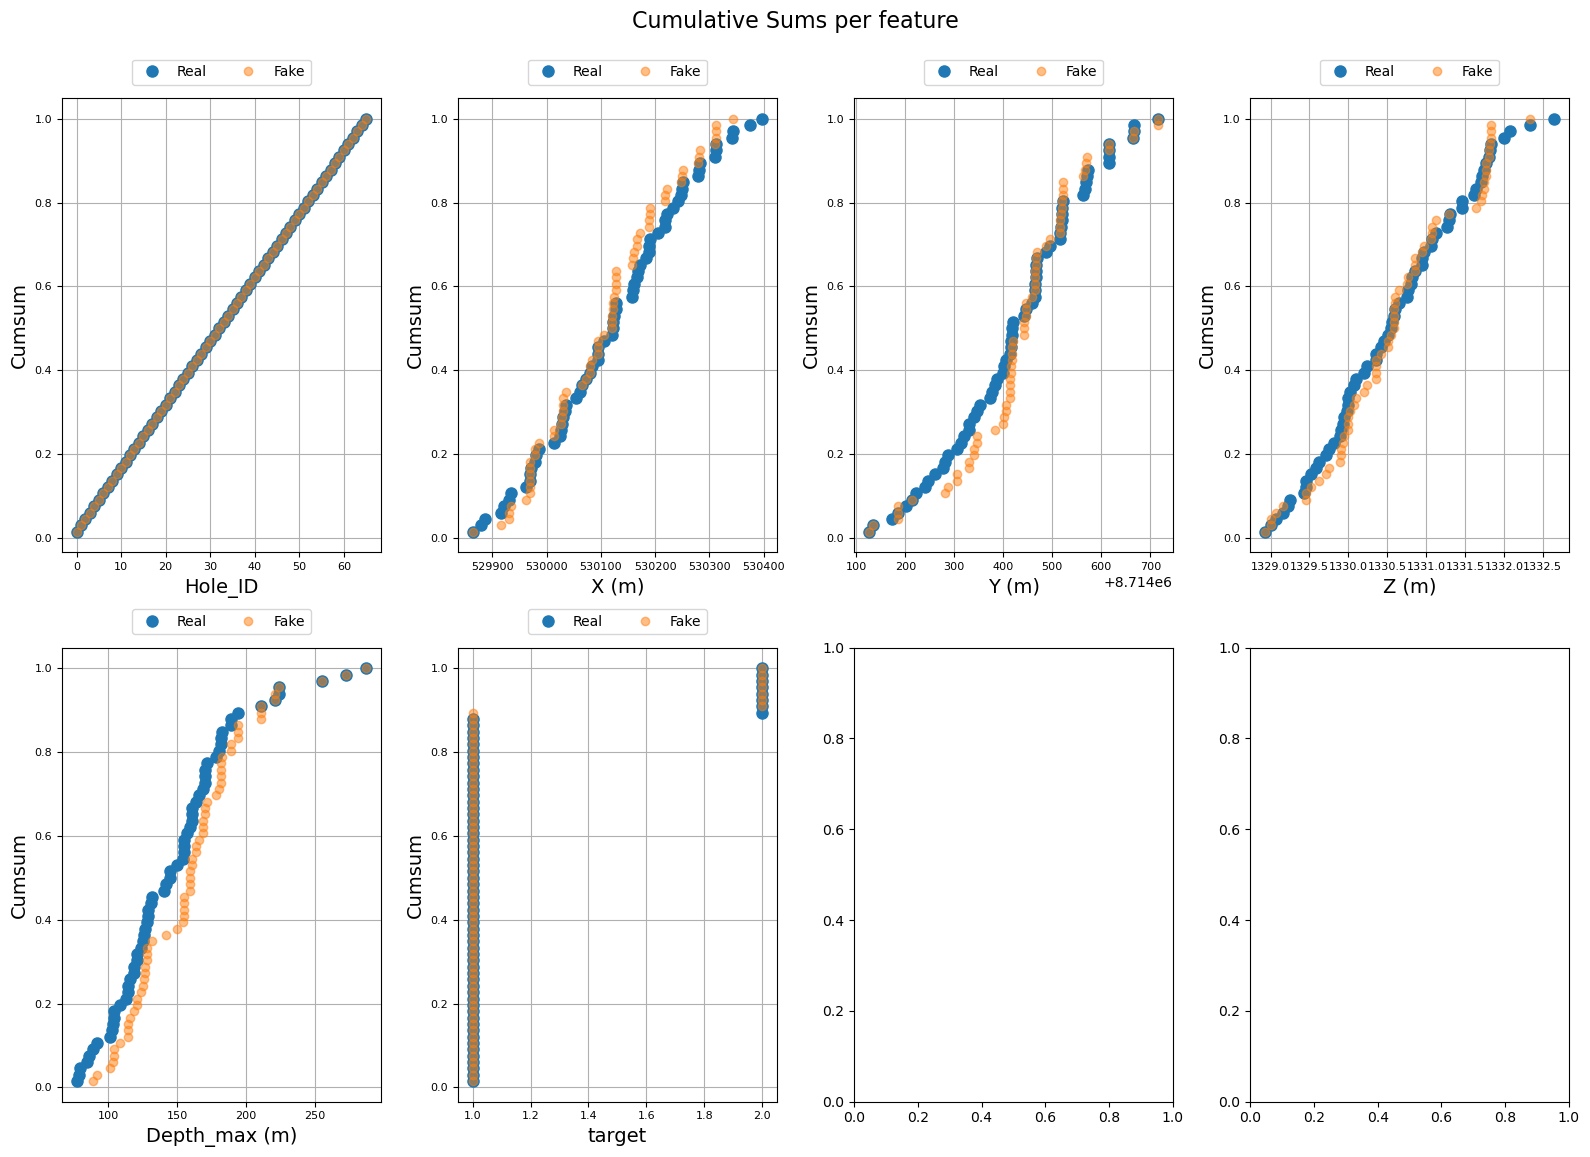

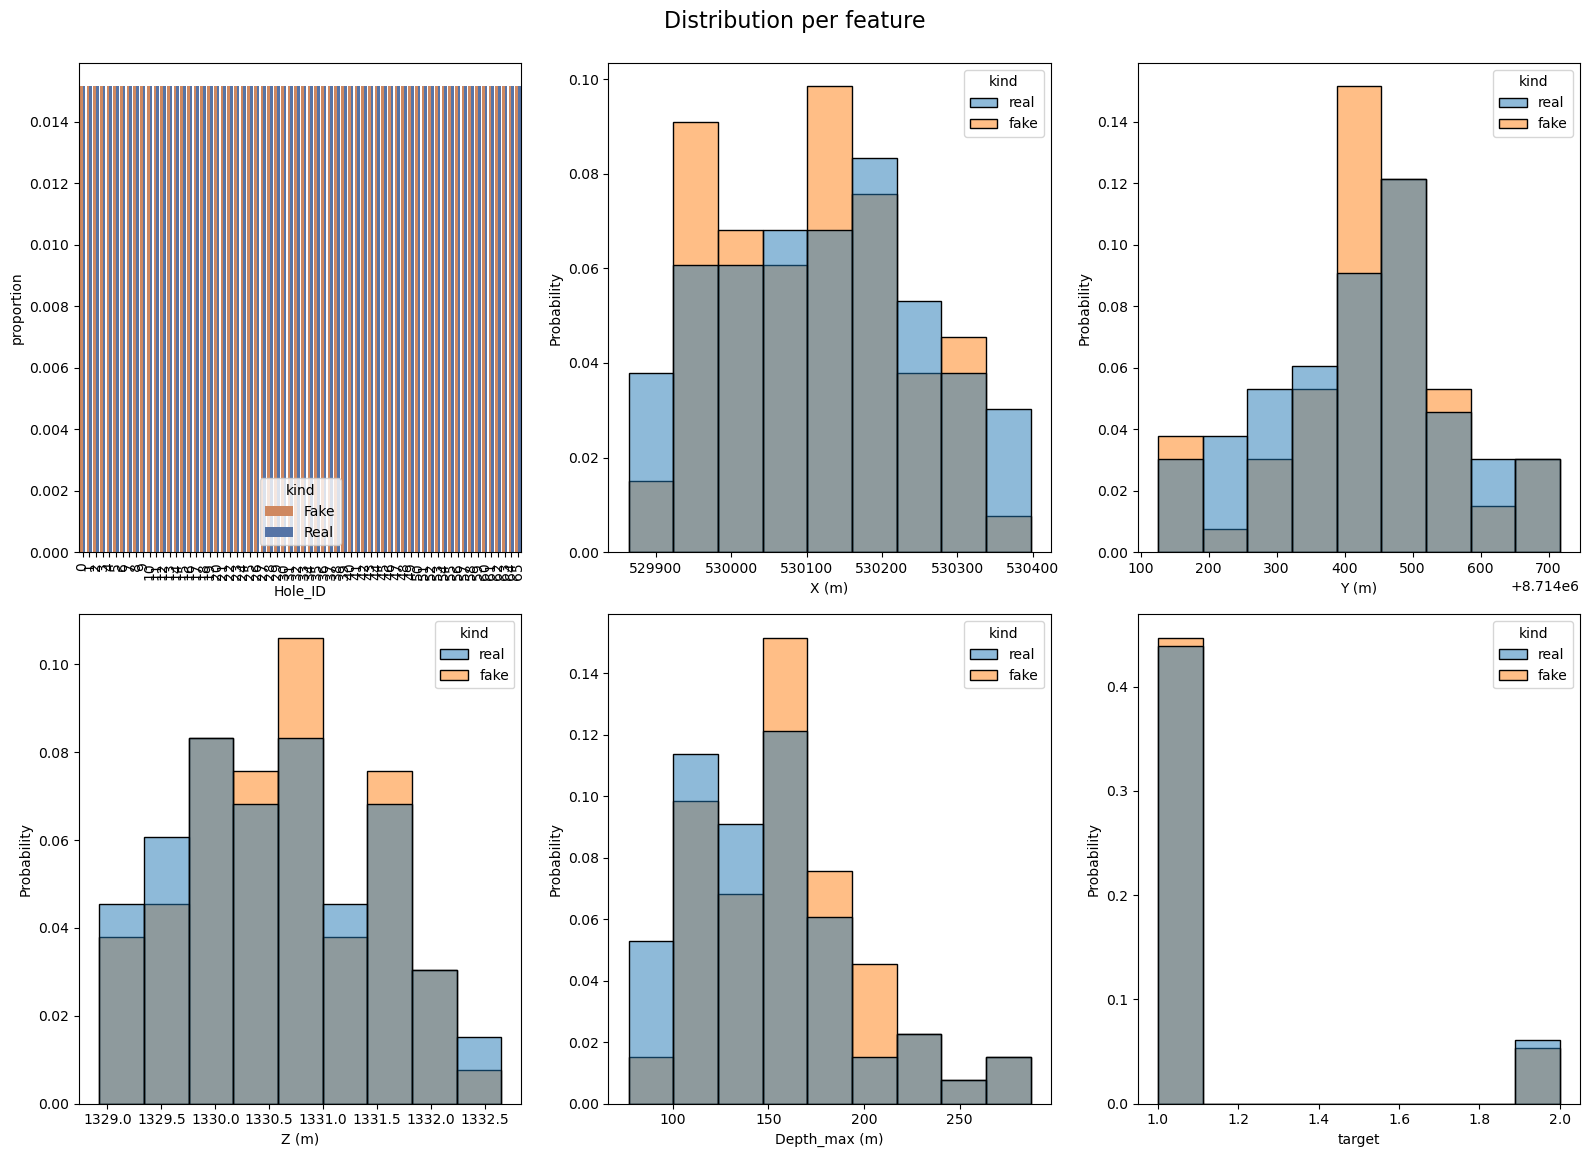

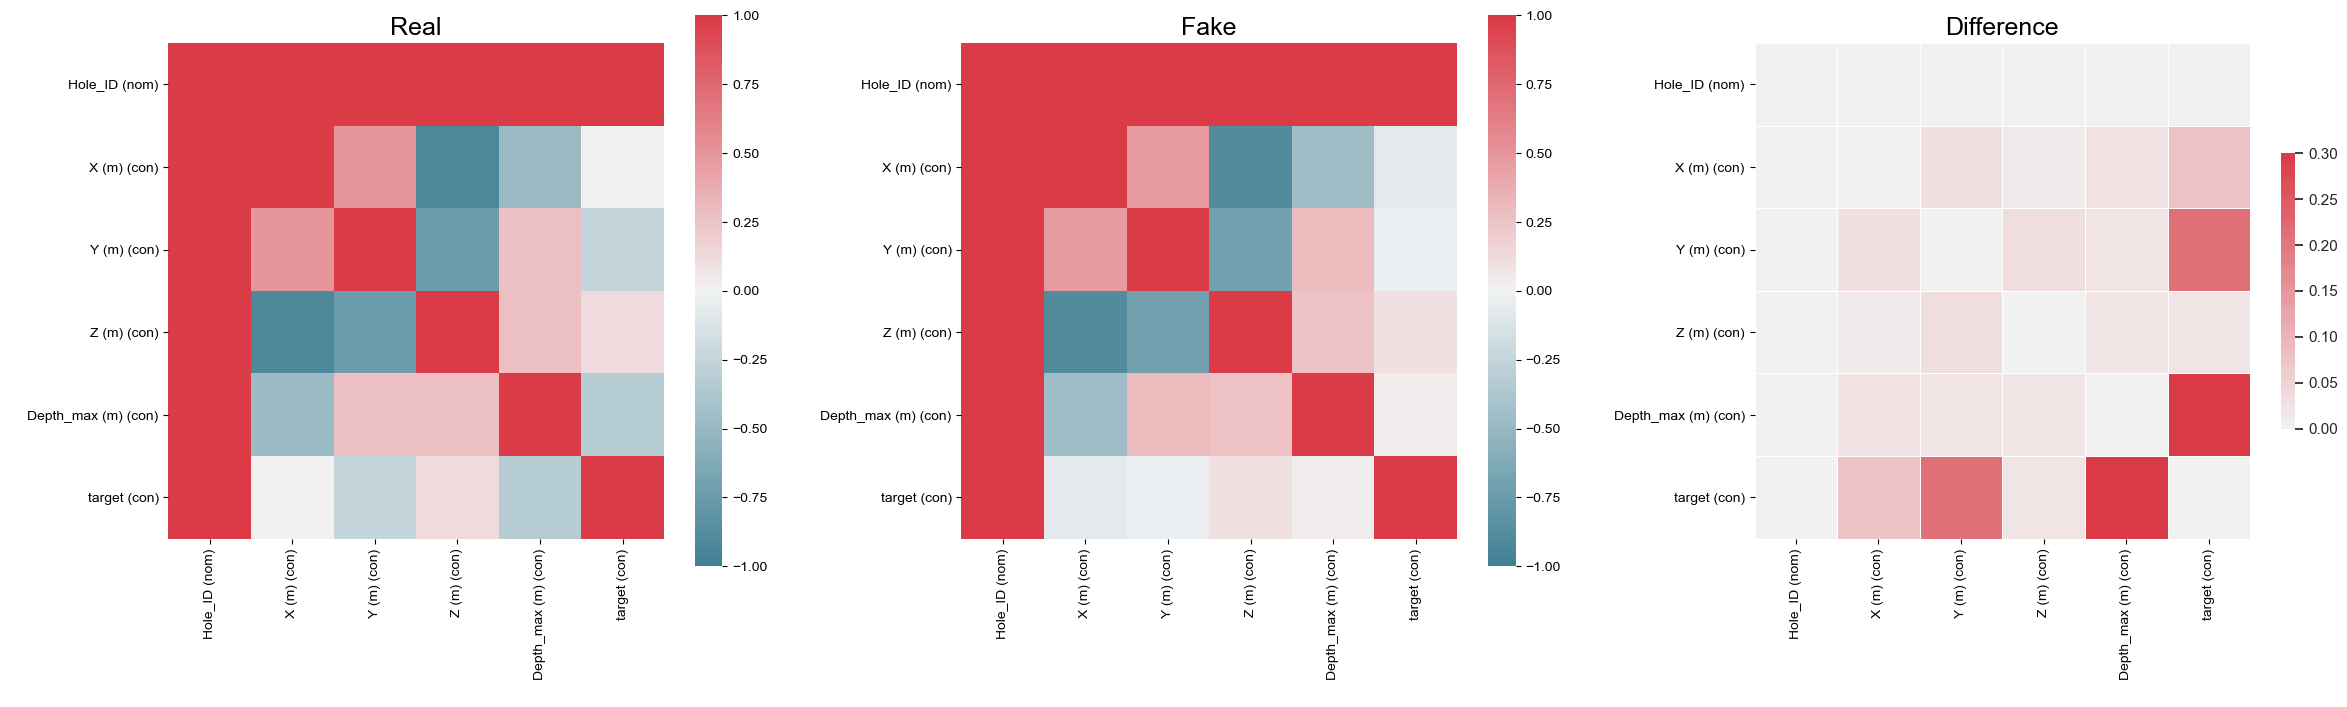

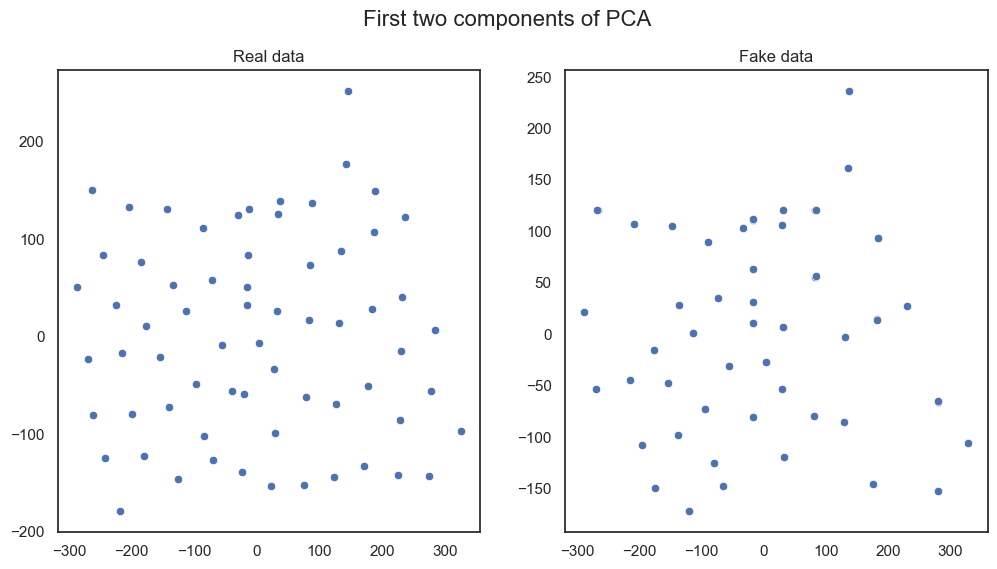

In [19]:
#Visualising the data
table_evaluator.visual_evaluation()

In [20]:
#Loading CopulaGAN Model
from sdv.tabular import CopulaGAN

In [21]:
#Training and fitting the data for CopulaGAN
model = CopulaGAN(primary_key='Hole_ID',
                 constraints=constraints,epochs=100,batch_size=5000,
                  generator_dim=(256, 256, 256),discriminator_dim=(256, 256, 256),verbose=True)
model.fit(collar)
new_data = model.sample(66)
new_data.head()

Epoch 1, Loss G:  4.2891,Loss D: -0.0008
Epoch 2, Loss G:  4.2614,Loss D: -0.0004
Epoch 3, Loss G:  4.2414,Loss D: -0.0011
Epoch 4, Loss G:  4.2335,Loss D: -0.0043
Epoch 5, Loss G:  4.2255,Loss D: -0.0041
Epoch 6, Loss G:  4.2101,Loss D: -0.0065
Epoch 7, Loss G:  4.1940,Loss D: -0.0087
Epoch 8, Loss G:  4.1879,Loss D: -0.0096
Epoch 9, Loss G:  4.1717,Loss D: -0.0069
Epoch 10, Loss G:  4.1508,Loss D: -0.0117
Epoch 11, Loss G:  4.1329,Loss D: -0.0040
Epoch 12, Loss G:  4.1203,Loss D: -0.0099
Epoch 13, Loss G:  4.0970,Loss D: -0.0041
Epoch 14, Loss G:  4.0821,Loss D: -0.0138
Epoch 15, Loss G:  4.0598,Loss D: -0.0097
Epoch 16, Loss G:  4.0410,Loss D: -0.0076
Epoch 17, Loss G:  4.0162,Loss D: -0.0112
Epoch 18, Loss G:  3.9826,Loss D: -0.0235
Epoch 19, Loss G:  3.9658,Loss D: -0.0125
Epoch 20, Loss G:  3.9361,Loss D: -0.0024
Epoch 21, Loss G:  3.8973,Loss D:  0.0044
Epoch 22, Loss G:  3.8829,Loss D:  0.0295
Epoch 23, Loss G:  3.8767,Loss D:  0.0440
Epoch 24, Loss G:  3.8475,Loss D:  0.0544
E

Sampling rows: 100%|██████████| 66/66 [00:00<00:00, 299.74it/s]


,Hole_ID,X (m),Y (m),Z (m),Depth_max (m),target
0,a,"529,863.8360","8,714,463.8610","1,332.3350",287.0000,1
1,b,"530,241.4610","8,714,616.2940","1,329.5780",128.5000,2
2,c,"530,182.4700","8,714,616.3630","1,329.8190",140.5000,1
3,d,"530,241.4610","8,714,616.2940","1,329.5780",128.5000,1
4,e,"529,962.5600","8,714,125.1120","1,331.7040",103.5000,1


In [22]:
from sdv.evaluation import evaluate

evaluate(new_data, collar)

0.4621212121212121

In [23]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(collar, new_data)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7857   0.7143              0.4737
DecisionTreeClassifier_real   1.0000   0.6429              0.4737
LogisticRegression_fake       0.8571   0.8571              1.0000
LogisticRegression_real       0.8571   0.8571              1.0000
MLPClassifier_fake            0.8571   0.8571              1.0000
MLPClassifier_real            0.8571   0.8571              1.0000
RandomForestClassifier_fake   0.8571   0.8571              0.7500
RandomForestClassifier_real   1.0000   0.7143              0.5556

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.3936
nearest neighbor std                     0.3053

Miscellaneous results:
                                  Result
Column Cor

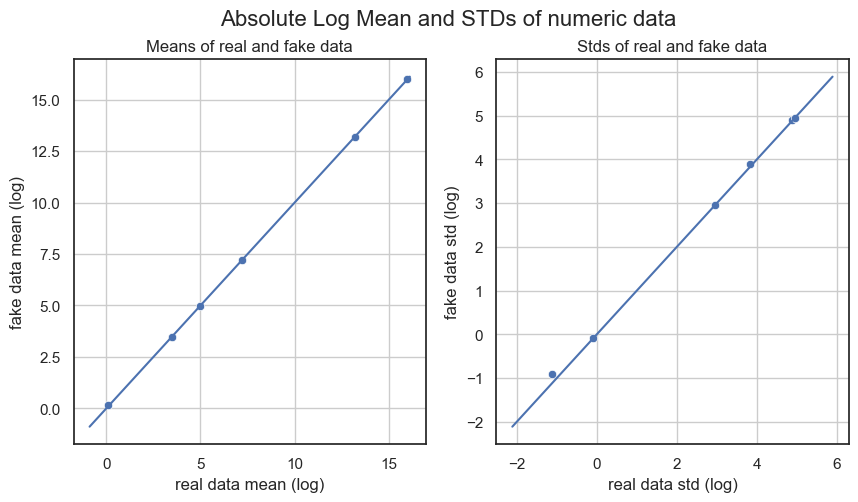

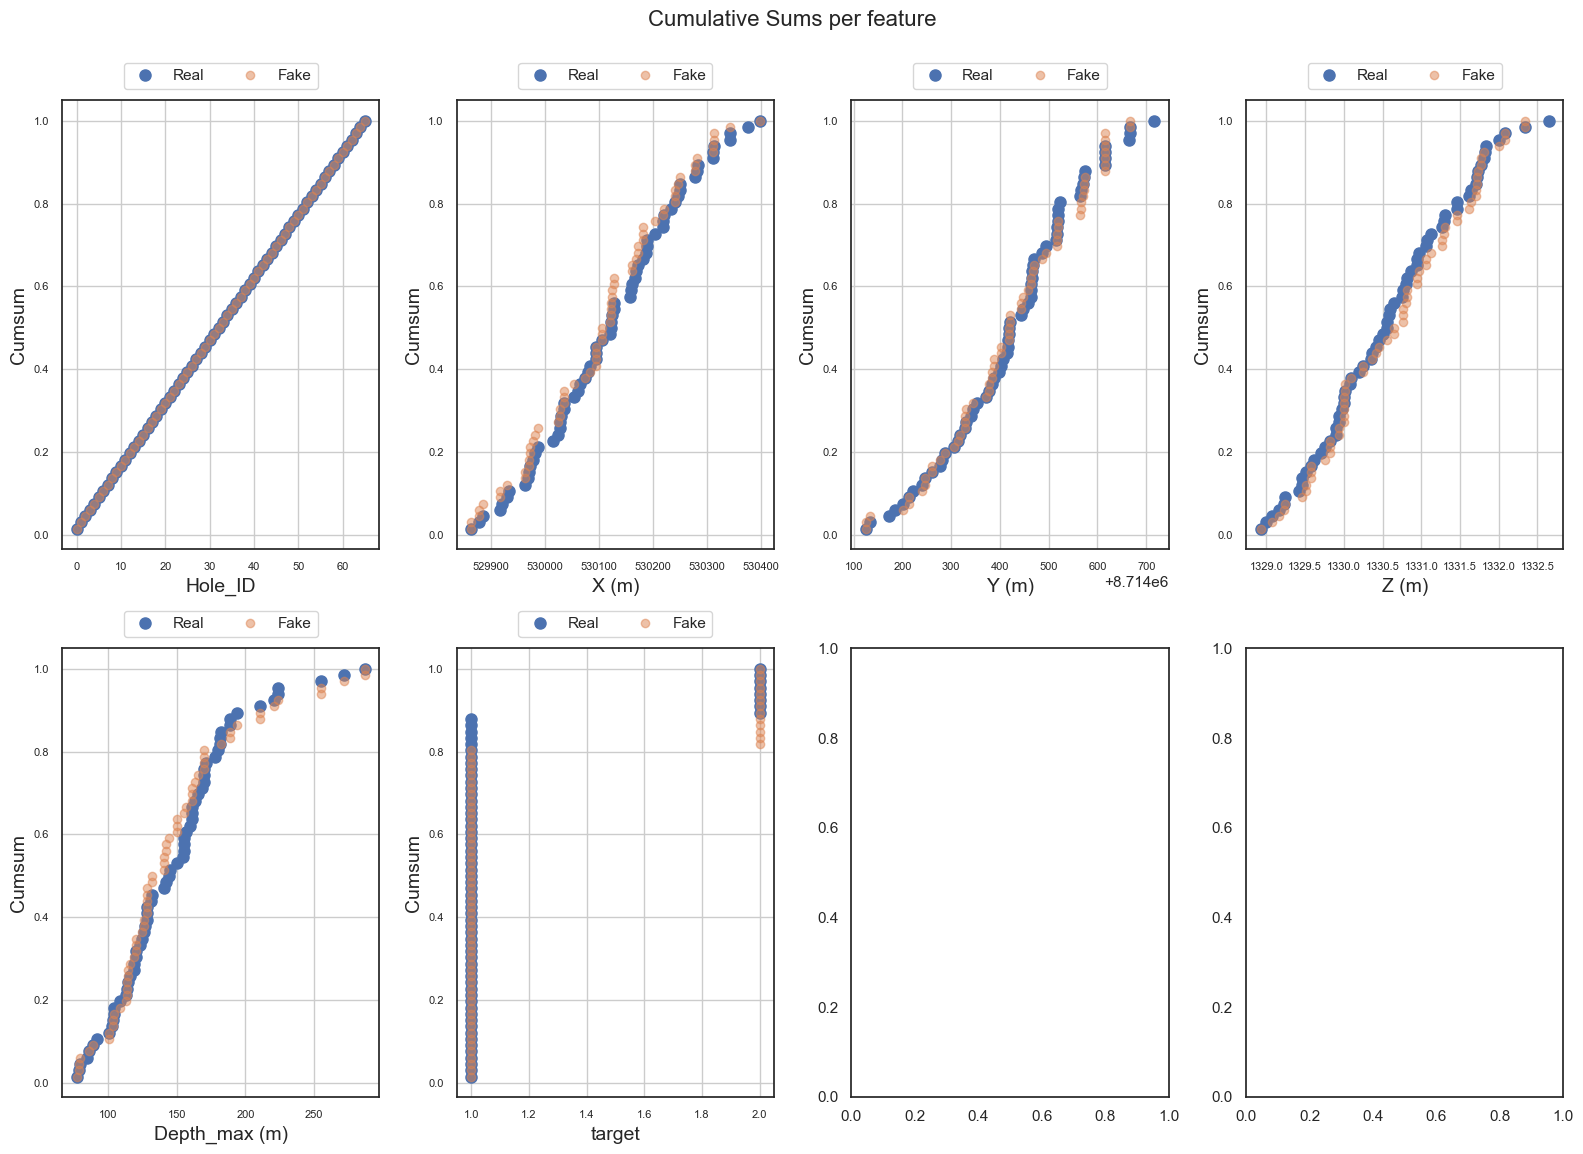

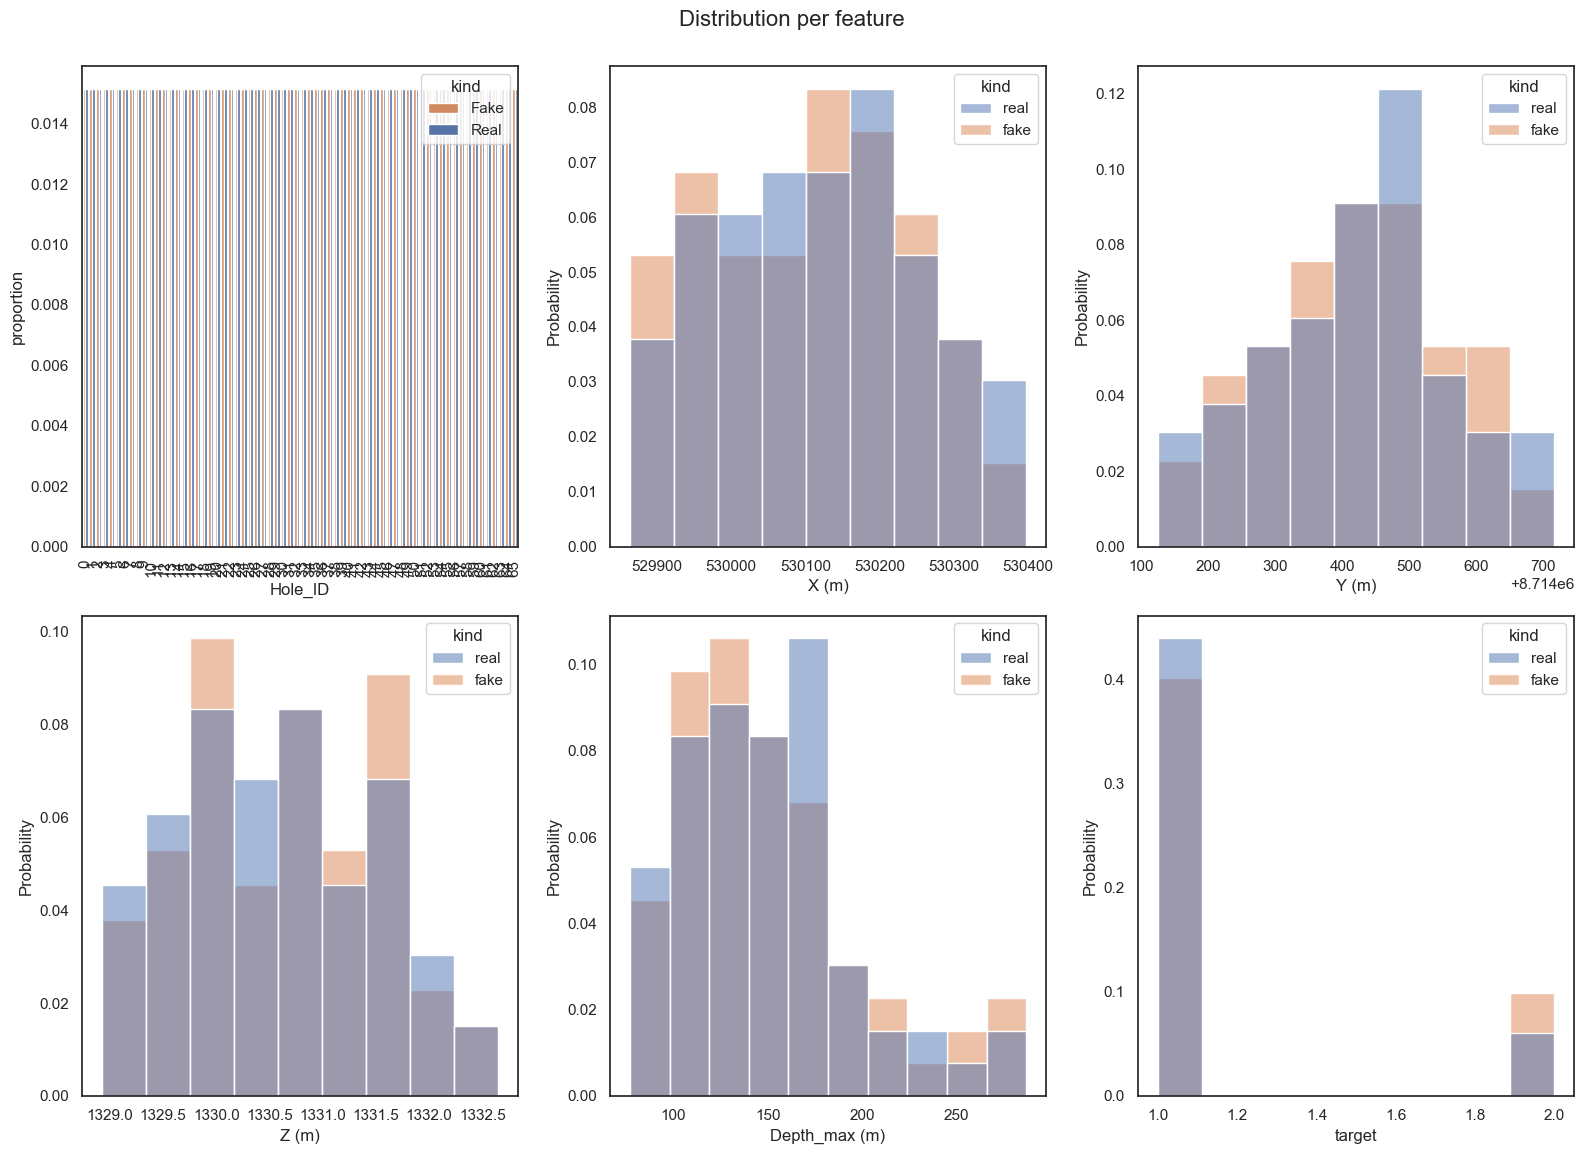

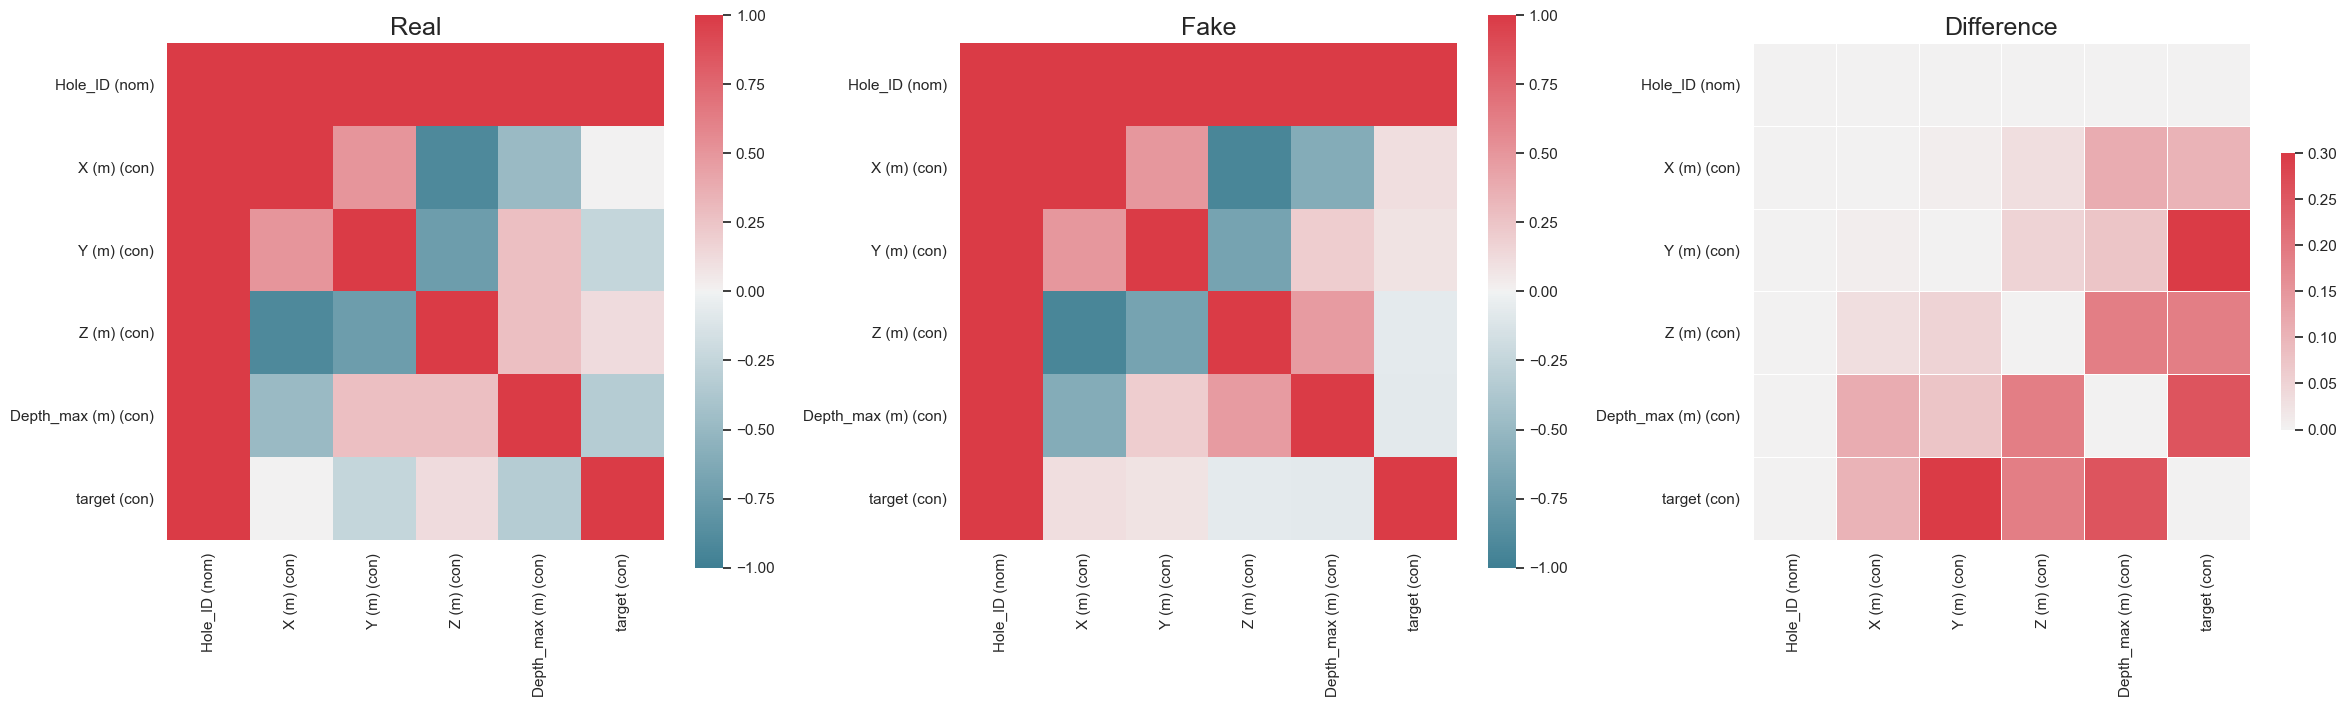

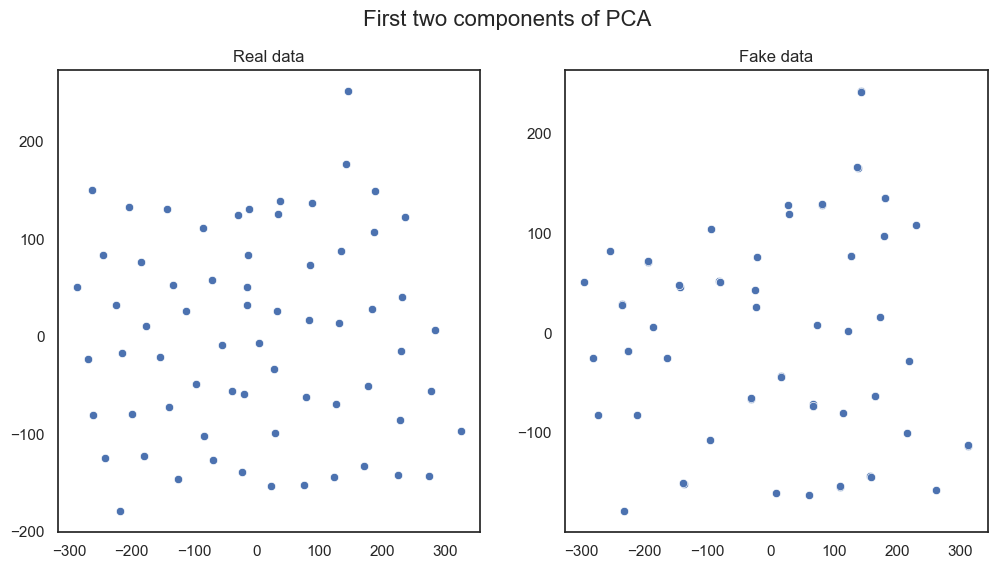

In [24]:
table_evaluator.visual_evaluation()

In [25]:
#Loading GaussianCopula
from sdv.tabular import GaussianCopula

In [26]:
model = GaussianCopula(primary_key='Hole_ID',constraints=constraints,
                      field_distributions={'Z': 'beta'})
model.fit(collar)
new_data2 = model.sample(66)
new_data2.head()

Sampling rows: 100%|██████████| 66/66 [00:00<00:00, 3320.79it/s]


,Hole_ID,X (m),Y (m),Z (m),Depth_max (m),target
0,a,"529,969.6880","8,714,184.4060","1,331.8320",128.0000,1
1,b,"529,916.4780","8,714,420.2880","1,331.7240",255.0000,2
2,c,"530,182.4700","8,714,616.3630","1,329.8190",140.5000,1
3,d,"530,281.0110","8,714,666.8370","1,328.9250",170.0000,1
4,e,"530,079.9880","8,714,416.3660","1,330.5040",155.0000,1


In [27]:
from sdv.evaluation import evaluate

evaluate(new_data2, collar)

0.43939393939393945

In [28]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(collar, new_data2)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7143   0.7143              0.5556
DecisionTreeClassifier_real   1.0000   0.7143              0.5556
LogisticRegression_fake       0.8571   0.8571              1.0000
LogisticRegression_real       0.7857   0.7857              1.0000
MLPClassifier_fake            0.8571   0.8571              1.0000
MLPClassifier_real            0.7857   0.7857              1.0000
RandomForestClassifier_fake   0.7143   0.7143              0.5556
RandomForestClassifier_real   1.0000   0.7143              0.5556

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.4590
nearest neighbor std                     0.2560

Miscellaneous results:
                                  Result
Column Cor

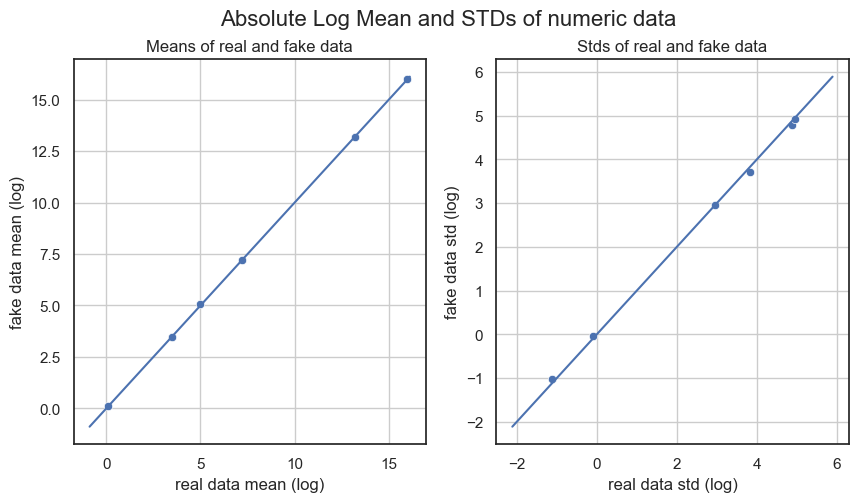

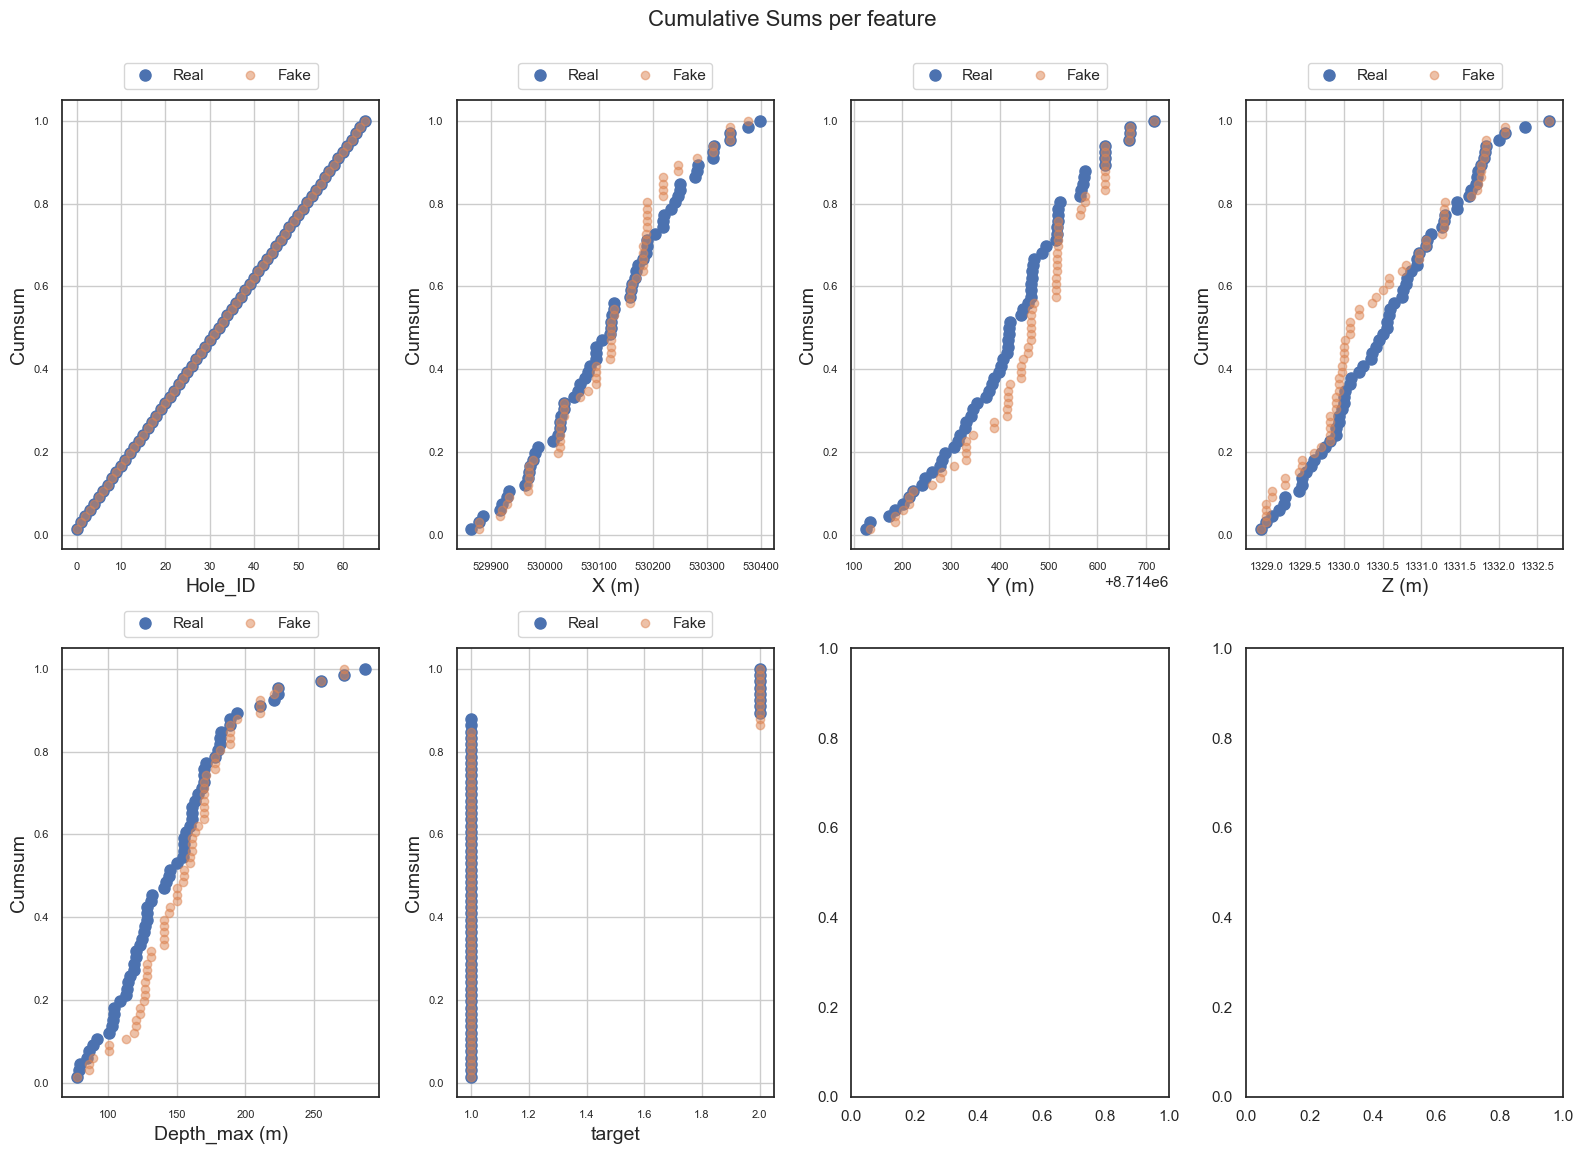

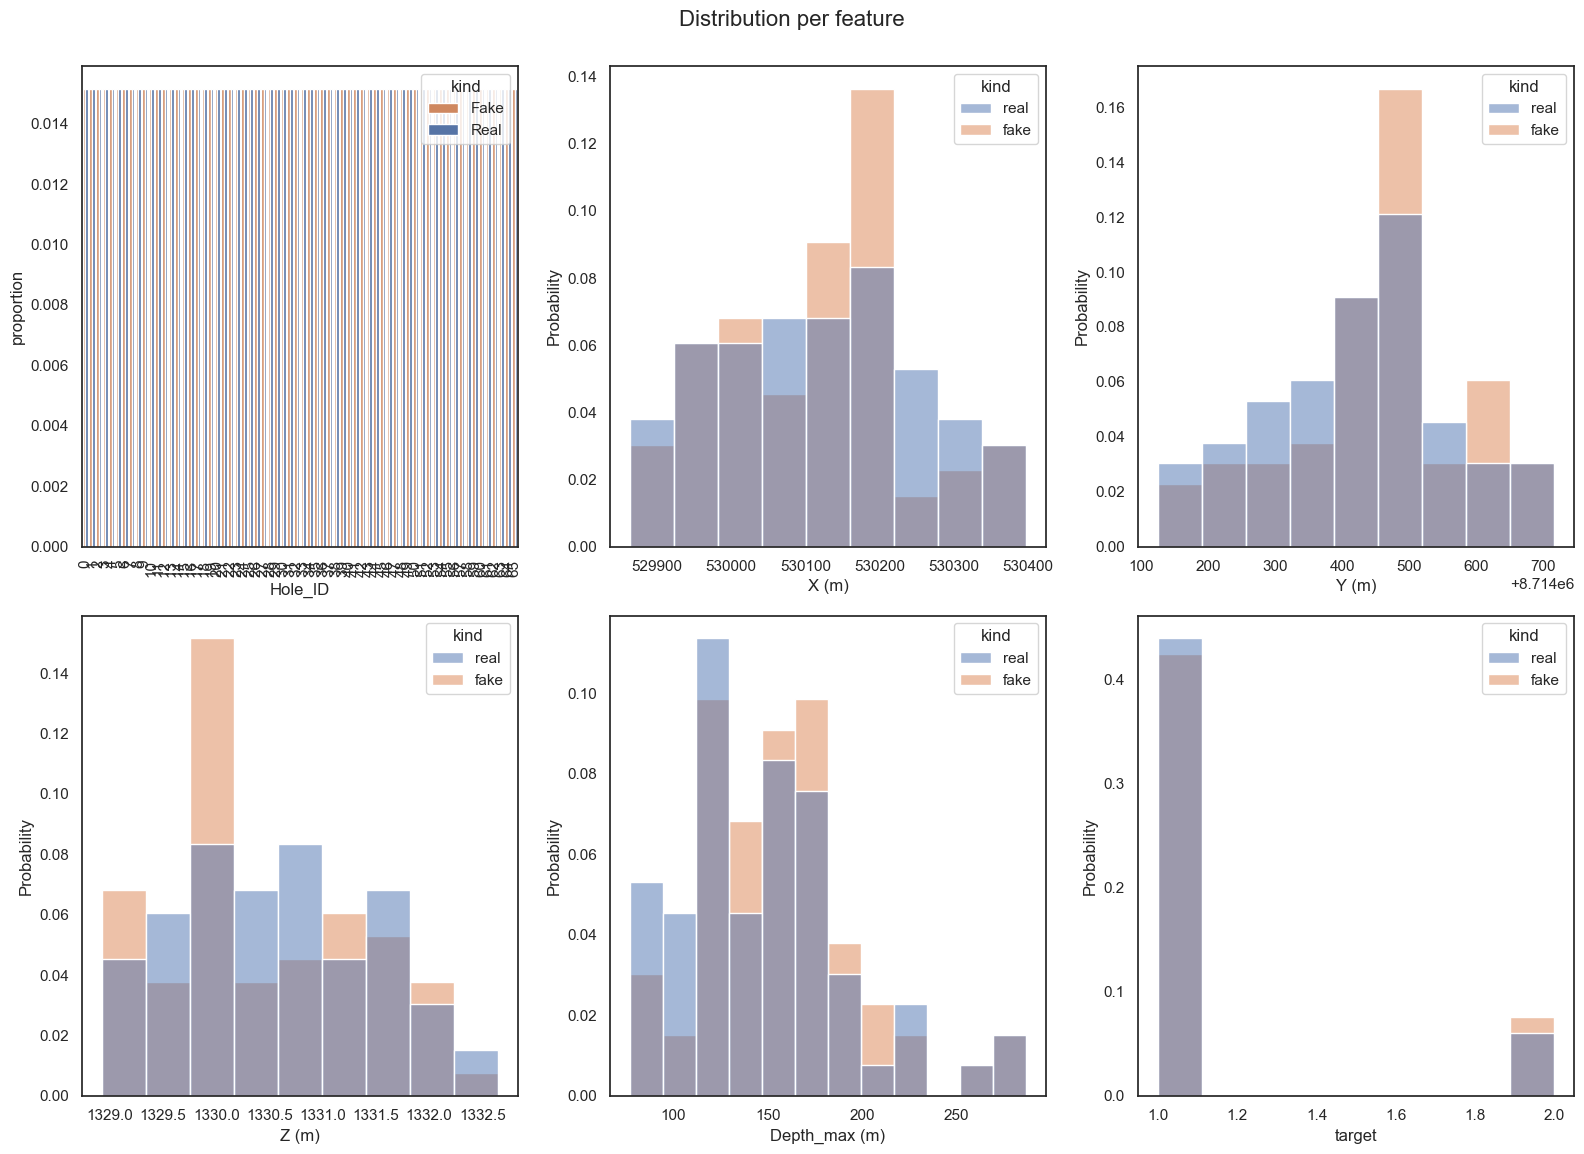

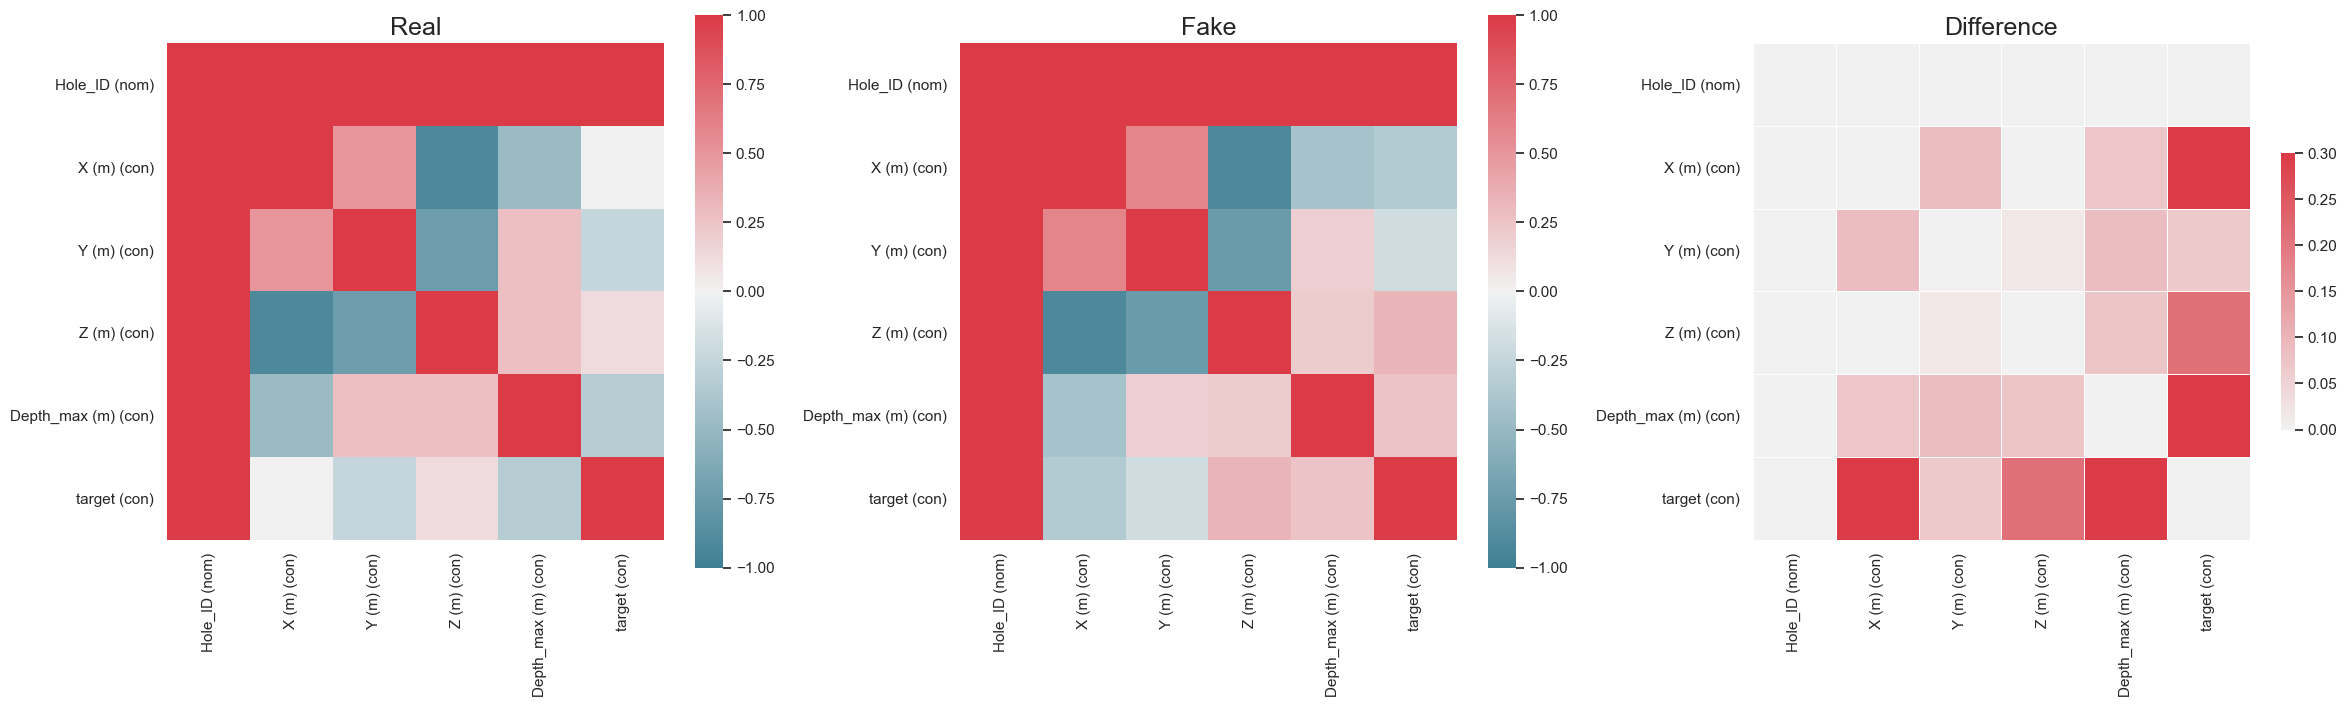

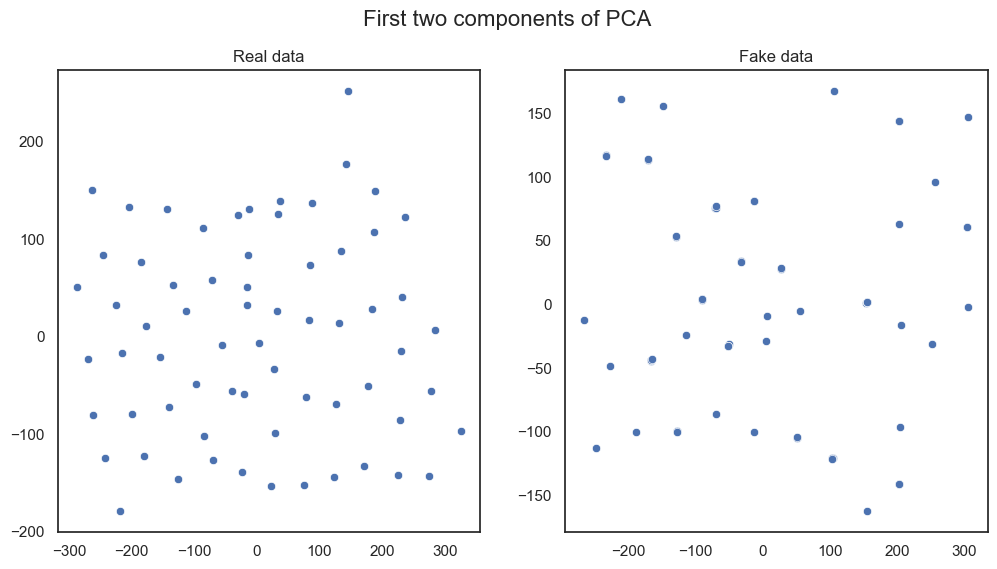

In [29]:
table_evaluator.visual_evaluation()

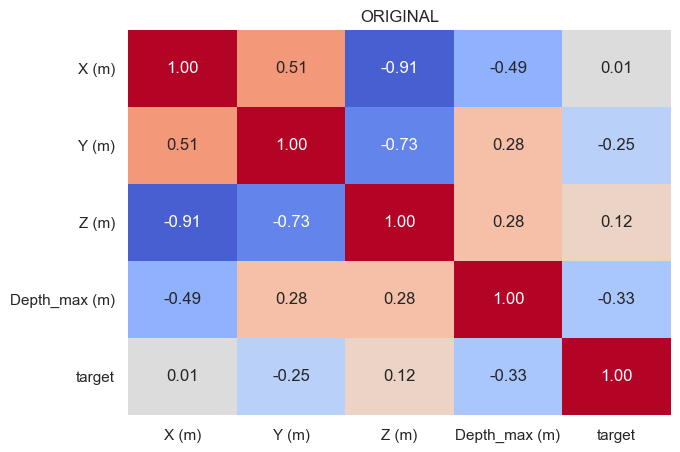

In [33]:
# Compute the correlation matrix
corr = collar.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('ORIGINAL')
plt.show()

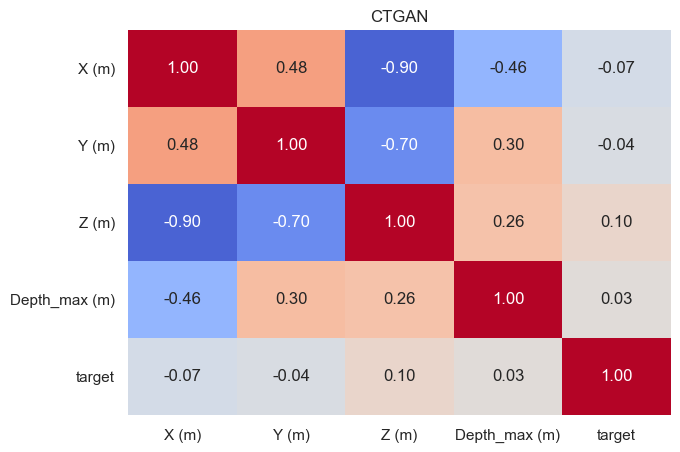

In [34]:
# Compute the correlation matrix
corr1 = new_collar.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CTGAN')
plt.show()

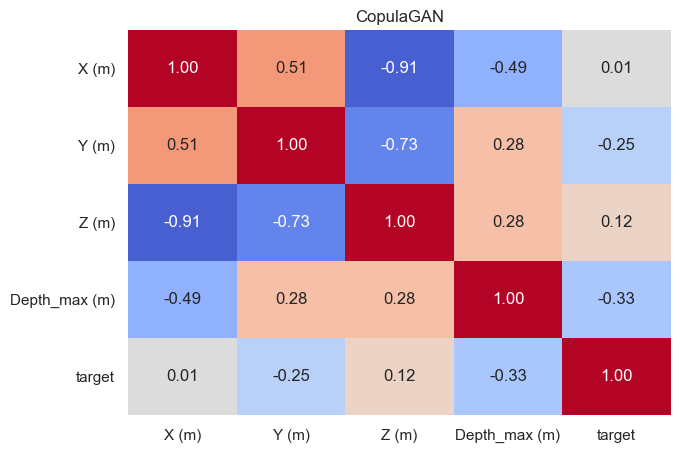

In [35]:
# Compute the correlation matrix
corr2 = new_data.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CopulaGAN')
plt.show()

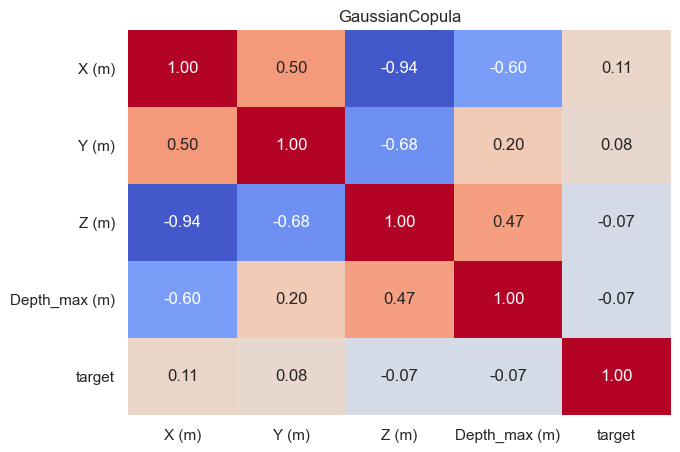

In [36]:
# Compute the correlation matrix
corr3 = new_data2.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr2, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('GaussianCopula')
plt.show()

In [39]:
from scipy.stats import pearsonr

In [44]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr1 = corr1.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr1)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CTGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CTGAN:  98.25641009990179 %


In [47]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr2 = corr2.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr2)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CopulaGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  97.21362201625408 %


In [50]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr3 = corr3.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr3)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and GaussianCopula: ", percentage_corr, "%")

Percentage of correlation coefficient between original and GaussianCopula:  94.35606716425617 %
